<a href="https://colab.research.google.com/github/AaronReichert/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [227]:
# lets look at what we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 34 columns):
bathrooms               48817 non-null float64
bedrooms                48817 non-null int64
created                 48817 non-null object
description             47392 non-null object
display_address         48684 non-null object
latitude                48817 non-null float64
longitude               48817 non-null float64
price                   48817 non-null int64
street_address          48807 non-null object
interest_level          48817 non-null object
elevator                48817 non-null int64
cats_allowed            48817 non-null int64
hardwood_floors         48817 non-null int64
dogs_allowed            48817 non-null int64
doorman                 48817 non-null int64
dishwasher              48817 non-null int64
no_fee                  48817 non-null int64
laundry_in_building     48817 non-null int64
fitness_center          48817 non-null int64
pre-war                 4

In [0]:
# substitute 'intrest_level' with numbers
df=df.replace({'high': 3, 'medium': 2, 'low': 1})

In [229]:
# how does it look?
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [230]:
# turning the created column to a usable format
df['created']=df['created'].astype('datetime64[ns]')
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [231]:
# lets look some more
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48817 entries, 0 to 49351
Data columns (total 34 columns):
bathrooms               48817 non-null float64
bedrooms                48817 non-null int64
created                 48817 non-null datetime64[ns]
description             47392 non-null object
display_address         48684 non-null object
latitude                48817 non-null float64
longitude               48817 non-null float64
price                   48817 non-null int64
street_address          48807 non-null object
interest_level          48817 non-null int64
elevator                48817 non-null int64
cats_allowed            48817 non-null int64
hardwood_floors         48817 non-null int64
dogs_allowed            48817 non-null int64
doorman                 48817 non-null int64
dishwasher              48817 non-null int64
no_fee                  48817 non-null int64
laundry_in_building     48817 non-null int64
fitness_center          48817 non-null int64
pre-war           

In [232]:
# more looking
cols=df.columns
for col in cols:
  print(df[col].value_counts())
  print()

1.0     39152
2.0      7619
3.0       680
1.5       645
0.0       304
2.5       256
4.0        93
3.5        55
4.5         8
5.0         4
10.0        1
Name: bathrooms, dtype: int64

1    15651
2    14569
0     9317
3     7188
4     1825
5      221
6       43
8        2
7        1
Name: bedrooms, dtype: int64

2016-05-14 01:11:03    3
2016-06-25 01:30:16    3
2016-06-05 01:32:36    3
2016-05-17 14:29:08    3
2016-05-14 05:23:52    3
                      ..
2016-04-22 01:38:50    1
2016-05-05 06:14:53    1
2016-05-13 06:14:39    1
2016-05-25 05:08:21    1
2016-06-11 02:18:23    1
Name: created, Length: 48148, dtype: int64

                                                                                                                                                                                                                                                                                                                                                                               

In [233]:
# lets select some columns to work with
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [0]:
# appliances 
# df['dishwasher'], df['laundry_in_unit'], df['laundry_in_unit'], df['elevator'], df['swimming_pool'], df['high_speed_internet'] , df['fitness_center'],df['laundry_in_building']
# fresh air
# df['outdoor_space'], df['garden_patio'],df['common_outdoor_space'],df['terrace'],df['roof_deck'],df['balcony']

In [236]:
# check for null values
df.isna().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [0]:
# create some new features for equpment fresh air number of rooms and how long the description is
df['equipment']=(df['dishwasher'] + (df['laundry_in_unit'])*1.5 + (df['elevator'])*.7 + df['swimming_pool'] + df['high_speed_internet']*.5 + df['fitness_center'] )
df['fresh_air']=((df['outdoor_space'])*1.3 + df['garden_patio'] + (df['common_outdoor_space'])*.6 + df['terrace'] + (df['roof_deck'])*1.5 + (df['balcony'])*2)
df['rooms']=(df['bathrooms']+df['bedrooms']+df['balcony']*.5+df['dining_room'])
df['verbose']=df['description'].str.len()

In [238]:
# who will rid me of those pesky null values
df=df.fillna(0)
df['verbose'].isna().sum()


0

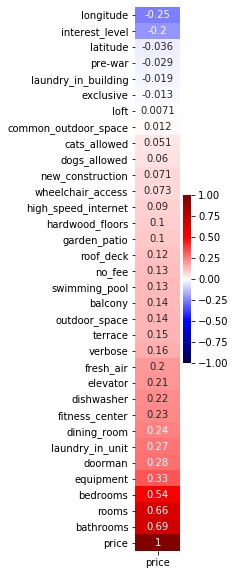

In [239]:
# I just like this graph, so usefull
import seaborn as sns
import matplotlib.pyplot as plt

corr_rent=df.corr()
corr_rent.head()
plt.figure(figsize=(1,10))
sns.heatmap(corr_rent[['price']].sort_values(by=['price']), cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.show()

In [240]:
# split into train and test

df['month']=df['created'].dt.month
df_train=df[df.month<6]
print(df_train.shape)
df_test=df[df.month==6]

(31844, 39)


In [0]:
# important imports 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# set up some baseline info on the model
target='price'
model=LinearRegression()

In [245]:
# Now lets look at my new features
features=['rooms','equipment','fresh_air','verbose']
model.fit(df_train[features],df_train[target])
train_pred=model.predict(df_train[features])
y_true=np.array(df_train[target])
train_accuracy=mean_absolute_error(df_train[target] , train_pred)
mse=mean_squared_error(df_train[target] , train_pred)
r2 = r2_score(df_train[target] , train_pred)
print('The results using',features)
print(f'Train root mean squared error ${mse**.5:,.2f}')
print(f'Train mean absolute error ${train_accuracy:,.2f}')
print(f'The train r2 score  is {r2:,.2f}')
print(f'Approximate train accuracy {1-(train_accuracy/df_train[target].mean()):.2%}')
test_pred=model.predict(df_test[features])
test_accuracy=mean_absolute_error(df_test[target] , test_pred)
mse=mean_squared_error(df_test[target] , test_pred)
r2 = r2_score(df_test[target] , test_pred)
print(f'Test root mean squared error ${mse**.5:,.2f}')
print(f'Test mean absolute error ${test_accuracy:,.2f}')
print(f'The test r2 score  is {r2:,.2f}')
print(f'Approximate test accuracy {1-(test_accuracy/df_test[target].mean()):.2%}')

The results using ['rooms', 'equipment', 'fresh_air', 'verbose']
Train root mean squared error $1,288.72
Train mean absolute error $855.30
The train r2 score  is 0.47
Approximate train accuracy 76.08%
Test root mean squared error $1,290.18
Test mean absolute error $869.13
The test r2 score  is 0.46
Approximate test accuracy 75.77%


In [246]:
# kitchen sink method
features=['bathrooms', 'bedrooms', 'latitude', 'longitude',
          'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
          'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
          'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
          'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
          'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
          'garden_patio', 'wheelchair_access', 'common_outdoor_space',
          'rooms', 'equipment', 'fresh_air','verbose','interest_level']
model.fit(df_train[features],df_train[target])
train_pred=model.predict(df_train[features])
y_true=np.array(df_train[target])
train_accuracy=mean_absolute_error(df_train[target] , train_pred)
mse=mean_squared_error(df_train[target] , train_pred)
r2 = r2_score(df_train[target] , train_pred)
print('The results using',features)
print(f'Train root mean squared error ${mse**.5:,.2f}')
print(f'Train mean absolute error ${train_accuracy:,.2f}')
print(f'The train r2 score  is {r2:,.2f}')
print(f'Approximate train accuracy {1-(train_accuracy/df_train[target].mean()):.2%}')
test_pred=model.predict(df_test[features])
test_accuracy=mean_absolute_error(df_test[target] , test_pred)
mse=mean_squared_error(df_test[target] , test_pred)
r2 = r2_score(df_test[target] , test_pred)
print(f'Test root mean squared error ${mse**.5:,.2f}')
print(f'Test mean absolute error ${test_accuracy:,.2f}')
print(f'The test r2 score  is {r2:,.2f}')
print(f'Approximate test accuracy {1-(test_accuracy/df_test[target].mean()):.2%}')


The results using ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space', 'rooms', 'equipment', 'fresh_air', 'verbose', 'interest_level']
Train root mean squared error $1,062.05
Train mean absolute error $673.37
The train r2 score  is 0.64
Approximate train accuracy 81.17%
Test root mean squared error $1,047.47
Test mean absolute error $676.97
The test r2 score  is 0.65
Approximate test accuracy 81.13%
